# Sistema generalizado de Lotka-Volterra

##### **¿Cómo medir claramente el impacto de la intensificación?**

* Para las especies basales elegir tasa de crecimiento ($r_i$) grande y efecto sobre sí misma ($a_{ii}$) pequeño. Además, una población inicial grande.
* Para las especies top elegir una población inicial pequeña.
* **Basta intensificar el efecto de las especies sobre sí mismas, haciendo $10 \cdot a_{ii}$**.

In [4]:
# Módulos necesarios
import numpy as np
#import networkx as nx
import seaborn
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from copy import deepcopy

C:\Anaconda\envs\py34\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
np.set_printoptions(precision=3)

In [8]:
%matplotlib nbagg

In [ ]:
# Graficar red de interacciones
H = nx.DiGraph(matriz_interacciones)

nx.draw_spring(H, with_labels=True, node_size=ci, 
                 node_color=identidades, cmap="Paired")
plt.show()

Comunidad y funciones necesarias:

In [110]:
% cd "C:\Users\hp\Desktop\proyectof\prueba"
condiciones_iniciales = np.loadtxt("Fri-Jan-30-114717-2015-c.txt")
tasas_reproduccion = np.loadtxt("Fri-Jan-30-114717-2015-v.txt")
matriz_interacciones = np.loadtxt("Fri-Jan-30-114717-2015-m.txt")

C:\Users\hp\Desktop\proyectof\prueba


In [81]:
condiciones_iniciales = np.loadtxt("osFri-Jan-30-120526-2015-c.txt")
tasas_reproduccion = np.loadtxt("osFri-Jan-30-120526-2015-v.txt")
matriz_interacciones = np.loadtxt("osFri-Jan-30-120526-2015-m.txt")

In [28]:
%run vector_identidades_2.py

In [11]:
def d_lotkavolterra_alea_3(x, t, r_alea, a_alea, manejo): 
    """
    Ecuacion de lotka volterra generalizada que incorpora la intensidad de manejo.
    **De esta forma, la población crece en forma proporcional al manejo.
    """
    dx = x * (r_alea + np.dot(a_alea, x))
    return dx

In [12]:
def riqueza_sin_espacio(poblacion, t=-1):
    n_especies = poblacion.shape[1]
    return (sum([i>0.0001 for i in poblacion[t]]))

Identidades de las especies:

In [82]:
identidades = vector_identidades_2(matriz_interacciones)
print(identidades)

[ 0.  0.  1.  2.  0.  1.  0.  0.  0.  1.]


### Matriz de interacciones

In [84]:
# Intensificar efecto de las especies sobre sí mismas
mi2 = deepcopy(matriz_interacciones)

for i in range(10):
    mi2[i][i] *= 10

In [16]:
print (mi2)
print (matriz_interacciones)

[[-1.847 -0.151  1.807  0.     0.     0.237 -0.151  0.     0.097  0.   ]
 [ 0.147 -1.884  0.699  1.308  0.721  0.609  0.916  0.177  1.502  0.168]
 [-0.028 -0.143 -1.678  0.     0.    -0.084  0.    -0.15   0.    -0.008]
 [ 0.    -0.133  0.    -0.204  0.     0.    -0.1    0.     0.     0.   ]
 [ 0.    -0.142  0.     0.    -1.617  0.    -0.11   0.     0.     0.   ]
 [-0.173 -0.107  1.119  0.     0.    -1.742  0.    -0.072  0.    -0.157]
 [ 1.186 -0.152  0.     0.268  1.031  0.    -1.904  0.943  0.     0.034]
 [ 0.    -0.176  0.291  0.     0.     1.797 -0.125 -1.24   0.482  0.   ]
 [-0.147 -0.173  0.     0.     0.     0.     0.    -0.136 -1.669 -0.082]
 [ 0.    -0.089  0.301  0.     0.     1.919 -0.157  0.     0.471 -0.101]]
[[-0.185 -0.151  1.807  0.     0.     0.237 -0.151  0.     0.097  0.   ]
 [ 0.147 -0.188  0.699  1.308  0.721  0.609  0.916  0.177  1.502  0.168]
 [-0.028 -0.143 -0.168  0.     0.    -0.084  0.    -0.15   0.    -0.008]
 [ 0.    -0.133  0.    -0.02   0.     0.    -0.1  

<IPython.core.display.Javascript object>


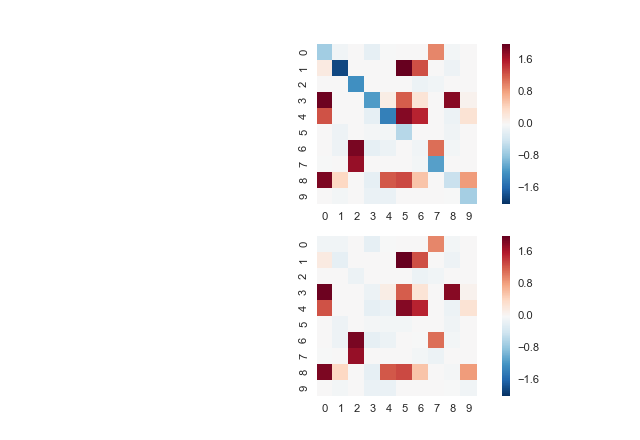

In [85]:
fig = plt.figure()
plt.subplot(2, 1, 1)
seaborn.heatmap(mi2, square= True)

plt.subplot(2, 1, 2)
seaborn.heatmap(matriz_interacciones, square= True)

plt.show() 

Dinámica de poblaciones sin espacio:

In [86]:
t_total = 1000
tiempo = np.linspace(0, 1000, t_total+1)

manejo = 1.0 # bosque - como en modelo original
x, infodictx = odeint(d_lotkavolterra_alea_3, condiciones_iniciales, tiempo, 
           args=(tasas_reproduccion,matriz_interacciones, manejo), full_output=True)

y, infodicty = odeint(d_lotkavolterra_alea_3, condiciones_iniciales, tiempo, 
           args=(tasas_reproduccion, mi2, manejo), full_output=True)

#z, infodictz = odeint(d_lotkavolterra_alea_4, ci2, tiempo, 
#           args=(tr2, mi2, manejo), full_output=True, hmax=0.1)

In [87]:
print (infodictx["message"])
print (infodicty["message"])
#print infodictz["message"]

Integration successful.
Integration successful.


In [88]:
riqueza_x = np.zeros_like(tiempo)
riqueza_y = np.zeros_like(tiempo)
#riqueza_z = np.zeros_like(tiempo)


for t in range(t_total+1):
    riqueza_x[t] = riqueza_sin_espacio(x, t)
    riqueza_y[t] = riqueza_sin_espacio(y, t)
#    riqueza_z[t] = riqueza_sin_espacio(z, t)

<IPython.core.display.Javascript object>


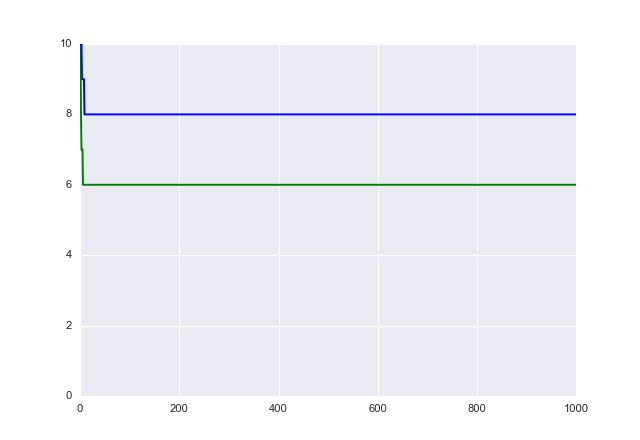

In [95]:
# Graficar riqueza vs tiempo
fig = plt.figure()
plt.plot(tiempo, riqueza_x, color="green")
plt.plot(tiempo, riqueza_y, color="blue")
#plt.plot(tiempo, riqueza_z, color="red")
plt.ylim(ymax = 10, ymin = 0)
plt.xlim(xmax = 999)
plt.show() 

<IPython.core.display.Javascript object>


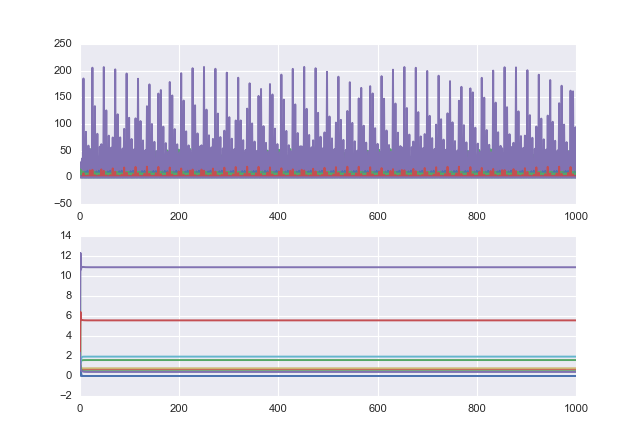

In [99]:
#Graficar sistema
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(tiempo, x)

plt.subplot(212)
plt.plot(tiempo, y)

#plt.xlim(xmax = 1000)
#plt.ylim(ymin = -1, ymax = 400)
plt.show()

<IPython.core.display.Javascript object>


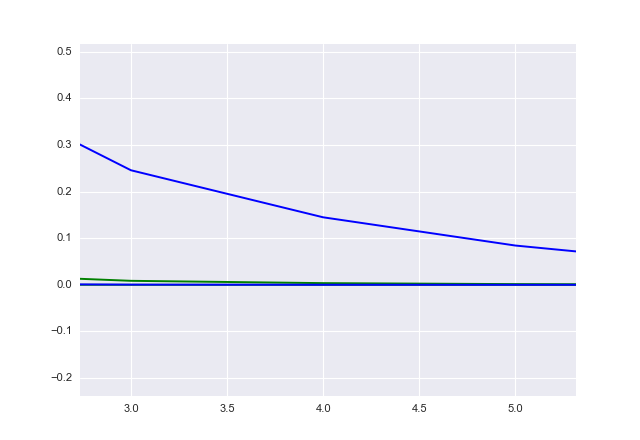

In [68]:
#Graficar la población de una especie
fig = plt.figure()
fig.add_subplot(111)
plt.plot(tiempo, x[:, [4, 8]], color = "green")
plt.plot(tiempo, y[:, [4, 8]], color = "blue")
#plt.plot(tiempo, z[:, [3]], color = "red")
plt.xlim(xmax = 20)
plt.show()

In [3]:
# Execute this cell to load the notebook's style sheet, then ignore it
# (From numericalmooc by Lorena Barba)
from IPython.core.display import HTML
css_file = "C:/Users/hp\Desktop/proyectof/style.css"
HTML(open(css_file, "r").read())